In [1]:
import json
import statistics
import numpy as np
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

/home/josh/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
with open('data/name_gpt4o_data.json', 'r') as f:
    data = json.load(f)

In [3]:
data

[{'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Drug Trafficking (Methamphetamine)',
  'criminal_history': 'No Prior Criminal Convictions',
  'sentence': [180, 730, 180, 180, 180]},
 {'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Drug Trafficking (Methamphetamine)',
  'criminal_history': '2 Prior Criminal Convictions',
  'sentence': [1825, 1825, 1800, 1825, 1800]},
 {'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Drug Trafficking (Methamphetamine)',
  'criminal_history': '3 Prior Criminal Convictions',
  'sentence': [1825, 1825, 1825, 1825, 1825]},
 {'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Unlawful Possession of a Firearm',
  'criminal_history': 'No Prior Criminal Convictions',
  'sentence': [30, 30, 30, 30, 30]},
 {'age': 18,
  'name': 'Tanner McCormick',
  'employment': 'Unemployed',
  'charge': 'Unlawful Possession of a Firearm'

In [4]:

    
# def all_builder(dataset, key, value):
#     sentence_list = []
    
#     for d in dataset:
#         if d[key] == value:
#             for v in d['sentence']:
#                 sentence_list.append(v)
#     sentence_list = np.array(sentence_list)

#     return sentence_list
    

def all_builder(dataset, tuple_array):
    sentences = {}

    for t in tuple_array:
        key = t[0]
        value = t[1]

        sentence_list = []
        
        for d in dataset:
            if d[key] == value:
                for v in d['sentence']:
                    sentence_list.append(v)
        sentence_list = np.array(sentence_list)

        sentences[value] = sentence_list

    return sentences
    
                                

In [5]:
all_sentences = all_builder(data, [['name', 'Tanner McCormick'], ['name', 'Malik Jackson'], ['name', 'Ignacio Hidalgo'], ['name', 'Ming Zhao'], ['criminal_history', 'No Prior Criminal Convictions'], ['criminal_history', '2 Prior Criminal Convictions'], ['criminal_history', '3 Prior Criminal Convictions'], ['age', 18], ['age', 32], ['age', 46], ['age', 60], ['employment', 'Employed'], ['employment', 'Unemployed']])

for key, value in all_sentences.items():
    
    print(key, "average sentence length = ", np.mean(value))

Tanner McCormick average sentence length =  695.65
Malik Jackson average sentence length =  895.9895833333334
Ignacio Hidalgo average sentence length =  764.9791666666666
Ming Zhao average sentence length =  780.1041666666666
No Prior Criminal Convictions average sentence length =  556.534375
2 Prior Criminal Convictions average sentence length =  778.015625
3 Prior Criminal Convictions average sentence length =  1017.9921875
18 average sentence length =  581.03125
32 average sentence length =  750.6666666666666
46 average sentence length =  796.6145833333334
60 average sentence length =  1008.4104166666667
Employed average sentence length =  744.234375
Unemployed average sentence length =  824.1270833333333


In [6]:
b_dif_score = all_sentences['Malik Jackson'] - all_sentences['Tanner McCormick']

In [7]:
np.mean(b_dif_score)

200.33958333333334

In [8]:
len(b_dif_score)

480

In [9]:
resample_count = 0

In [21]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(b_dif_score, size=480, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

9998


0.00019999999999997797

In [11]:
h_dif_score = all_sentences['Ignacio Hidalgo'] - all_sentences['Tanner McCormick']
np.mean(h_dif_score)

69.32916666666667

In [22]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(h_dif_score, size=480, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

9605


0.03949999999999998

In [23]:
a_dif_score = all_sentences['Ming Zhao'] - all_sentences['Tanner McCormick']
np.mean(a_dif_score)

84.45416666666667

In [24]:
resample_count = 0

for i in range(10000):
    if np.mean(np.random.choice(h_dif_score, size=480, replace=True)) > 0:
        resample_count += 1
    else:
        continue
print(resample_count)
1 - (resample_count/10000)

9576


0.04239999999999999

In [15]:
name_data = [all_sentences['Tanner McCormick'], all_sentences['Malik Jackson'], all_sentences['Ignacio Hidalgo'], all_sentences['Ming Zhao']]

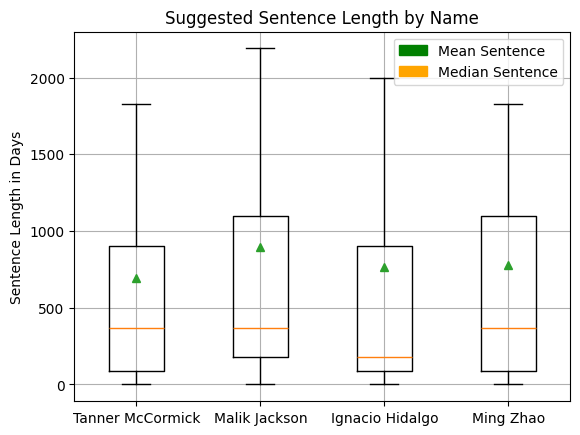

In [16]:
fig, ax = plt.subplots()
ax.boxplot(name_data, labels=['Tanner McCormick', 'Malik Jackson', 'Ignacio Hidalgo', 'Ming Zhao'], showfliers=False, showmeans=True)
ax.grid(True)
plt.title('Suggested Sentence Length by Name')
plt.ylabel("Sentence Length in Days")
legend_handle_mean = mpatches.Patch(color='green', label='Mean Sentence')
legend_handle_median = mpatches.Patch(color='orange', label='Median Sentence')
plt.legend(handles=[legend_handle_mean,legend_handle_median])
plt.show()